# Help Twitter Combat Hate Speech Using NLP and Machine Learning.

DESCRIPTION

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

Problem Statement:  

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content: 

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

Tasks: 

   1. Load the tweets file using read_csv function from Pandas package. 

   2. Get the tweets into a list for easy text cleanup and manipulation.

   3. To cleanup:
   

        1. Normalize the casing.

        2. Using regular expressions, remove user handles. These begin with '@’.

        3. Using regular expressions, remove URLs.

        4. Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

        5. Remove stop words.

        6. Remove redundant terms like ‘amp’, ‘rt’, etc.

        7. Remove ‘#’ symbols from the tweet while retaining the term.
        

   4. Extra cleanup by removing terms with a length of 1.

   5. Check out the top terms in the tweets:
   

        1. First, get all the tokenized terms into one large list.

        2. Use the counter and find the 10 most common terms.
        

   6. Data formatting for predictive modeling:
   

        1. Join the tokens back to form strings. This will be required for the vectorizers.

        2. Assign x and y.

        3. Perform train_test_split using sklearn.
        

   7. We’ll use TF-IDF values for the terms as a feature to get into a vector space model:
   

        1. Import TF-IDF  vectorizer from sklearn.

        2. Instantiate with a maximum of 5000 terms in your vocabulary.

        3. Fit and apply on the train set.

        4. Apply on the test set.
        

   8. Model building: Ordinary Logistic Regression:
   

        1. Instantiate Logistic Regression from sklearn with default parameters.

        2. Fit into  the train data.

        3. Make predictions for the train and the test set.
        

   9. Model evaluation: Accuracy, recall, and f_1 score:
   

        1. Report the accuracy on the train set.

        2. Report the recall on the train set: decent, high, or low.

        3. Get the f1 score on the train set.
        

   10. Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s:
   

        1. Adjust the appropriate class in the LogisticRegression model.
        

   11. Train again with the adjustment and evaluate:
   

        1. Train the model on the train set.

        2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score.
        

   12. Regularization and Hyperparameter tuning:
   

        1. Import GridSearch and StratifiedKFold because of class imbalance.

        2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

        3. Use a balanced class weight while instantiating the logistic regression.
        

   13. Find the parameters with the best recall in cross-validation:
   

        1. Choose ‘recall’ as the metric for scoring.

        2. Choose a stratified 4 fold cross-validation scheme.

        3. Fit into  the train set.
        

   14. What are the best parameters?

   15. Predict and evaluate using the best estimator:
   

        1. Use the best estimator from the grid search to make predictions on the test set.

        2. What is the recall on the test set for the toxic comments?

        3. What is the f_1 score?


## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd

import re
import nltk
import string
import warnings
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
warnings.filterwarnings(action='ignore')
%matplotlib inline

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score,recall_score, roc_curve, roc_auc_score

## Data Preprocessing

In [2]:
lemma = nltk.WordNetLemmatizer()
SW = set(stopwords.words('english'))
punctuation = [".",",","?","!",":",";",")","("]

In [3]:
df = pd.read_csv('TwitterHate.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
X_data = df.tweet
y = df.label

In [5]:
y.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
def clean_text(text):
    data = " ".join([word.lower() for word in text.split()           # Normalize the text.
                     
                            if not word in punctuation               # Remove punctuation marks.
                     
                            if not 'http' in word                    # Remove URLs.
                     
                            if not 'amp' in word                     # Remove ampersands.
                     
                            if not '@' in word                       # Remove user names.

                            if not '_' in word                       # Remove words with underscores.
                     
                            if not word.isalnum()                    # Remove alphanumeric characters.
                     
                            if word != 'RT'])                        # Remove RTs.
    
    data = re.sub("\d", "", data)                                    # Remove digits as they do not reflect the 
                                                                     # sentiment in a tweet.
        
    data = re.sub("#", "", data)                                     # Remove the hash symbols but keep the word.
        
    data = data.encode("ascii","ignore")                             # Encode the entire text to utf-8 to remove 
                                                                     # ascii characters.
        
    data = data.decode()                                             # Remove the non utf-8 encoded characters.
    
    tokens = re.split("\s+|\W+",data)                                # Split the text with respect to blank space 
                                                                     # and special characters.
        
    cleaned_text = [lemma.lemmatize(word) for word in tokens         # Lemmatize words to find root words.
                    
                    if word                                          # Remove blank strings from the list.
                    
                    if not word in SW                                # Remove the stopwords.
                    
                    if len(word)>3]                                  # Only use words with a length of 4 characters
                                                                     # or greater.
    return cleaned_text

In [7]:
occurance = clean_text("".join(X_data))
sorted(occurance[:25])

['actorslife',
 'allin',
 'allshowandnogo',
 'blog',
 'cavs',
 'cleveland',
 'clevelandcavaliers',
 'dannythe',
 'disapointed',
 'dysfunction',
 'exam',
 'exam',
 'factsguide',
 'getthanked',
 'girlwe',
 'hate',
 'imagine',
 'ireland',
 'land',
 'leave',
 'lyft',
 'majestymodel',
 'motivation',
 'revolutionschool',
 'school']

In [8]:
print("The total number of features are:",len(set(occurance)))

The total number of features are: 26840


In [9]:
count = Counter(occurance).most_common(10)
count

[('love', 1617),
 ('positive', 889),
 ('smile', 658),
 ('life', 650),
 ('father', 633),
 ('healthy', 573),
 ('today', 531),
 ('thankful', 495),
 ('friend', 435),
 ('affirmation', 422)]

In [10]:
word = []
counter = []
for i in range(len(count)):
    word.append(count[i][0])
    counter.append(count[i][1])
    
print(word)                      
print(counter)

['love', 'positive', 'smile', 'life', 'father', 'healthy', 'today', 'thankful', 'friend', 'affirmation']
[1617, 889, 658, 650, 633, 573, 531, 495, 435, 422]


<BarContainer object of 10 artists>

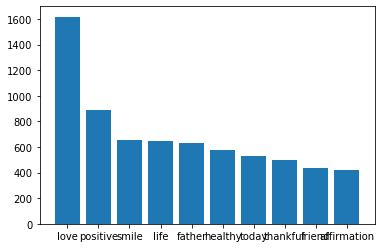

In [11]:
plt.bar(x=word, height=counter)         # Plot the 10 most freuently used words in the tweets.

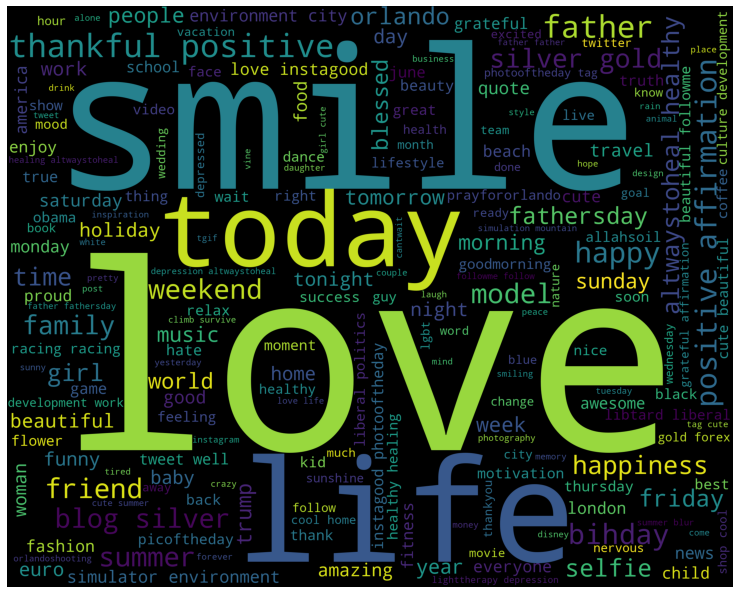

In [12]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2500,
                      height=2000).generate(" ".join(occurance))
plt.figure(1,figsize=(13,13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
tfidf = TfidfVectorizer(analyzer=clean_text, max_features=5000)

In [14]:
X_tfidf = tfidf.fit_transform(X_data)

In [15]:
feature_names = tfidf.get_feature_names()
feature_names[:25]

['abasel',
 'abba',
 'ableg',
 'ableism',
 'aboutlastnight',
 'abrahamhicks',
 'abstracta',
 'absurd',
 'abundance',
 'abuse',
 'abusive',
 'acab',
 'academy',
 'accept',
 'acceptable',
 'access',
 'accessnetwork',
 'accessory',
 'accident',
 'account',
 'accountable',
 'ache',
 'achieve',
 'acne',
 'acoustic']

In [16]:
X_dtm = X_tfidf.toarray()
X_dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X = pd.DataFrame(X_dtm, columns=feature_names)
X.head()

,abasel,abba,ableg,ableism,aboutlastnight,abrahamhicks,abstracta,absurd,abundance,abuse,...,zara,zaynmalik,zelda,zionazis,zionism,zionist,zombie,zone,zootopia,zoro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
X.shape

(31962, 5000)

###### Over Sampling of the minority class is done to balance out the classes.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
X_train.shape

(23971, 5000)

In [21]:
X_train.head()

,abasel,abba,ableg,ableism,aboutlastnight,abrahamhicks,abstracta,absurd,abundance,abuse,...,zara,zaynmalik,zelda,zionazis,zionism,zionist,zombie,zone,zootopia,zoro
15306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_train.head()

15306    0
17706    0
5131     0
28515    0
14572    0
Name: label, dtype: int64

## Build the Model

### Logistic Regression without class weights

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
lr.score(X_test, y_test)

0.9480665748967588

In [25]:
pred_lr = lr.predict(X_test)

In [26]:
accuracy_score(y_test, pred_lr)

0.9480665748967588

In [27]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7453
           1       0.88      0.27      0.41       538

    accuracy                           0.95      7991
   macro avg       0.91      0.63      0.69      7991
weighted avg       0.94      0.95      0.93      7991



In [28]:
print(confusion_matrix(y_test, pred_lr))

[[7433   20]
 [ 395  143]]


In [29]:
recall_score(y_test, pred_lr)

0.26579925650557623

In [30]:
f1_score(y_test, pred_lr)

0.40798858773181174

In [31]:
y_pred_prob_lr = lr.predict_proba(X_test)
y_pred_prob_lr[:10]

array([[0.94478339, 0.05521661],
       [0.94001303, 0.05998697],
       [0.99416074, 0.00583926],
       [0.93413018, 0.06586982],
       [0.98895757, 0.01104243],
       [0.93413018, 0.06586982],
       [0.93413018, 0.06586982],
       [0.9942383 , 0.0057617 ],
       [0.94368965, 0.05631035],
       [0.99033275, 0.00966725]])

In [32]:
y_pred_prob = y_pred_prob_lr[:,1]

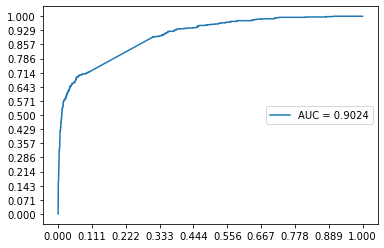

In [33]:
fpr, tpr, t = roc_curve(y_test, y_pred_prob)

auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='AUC = '+str(round(auc,4)))
plt.xticks(np.linspace(0,1,10))
plt.yticks(np.linspace(0,1,15))
plt.legend(loc=5)
plt.show()

### Logistic Regression with class weights

In [34]:
y_train.value_counts()

0    22267
1     1704
Name: label, dtype: int64

In [35]:
y_train.value_counts()/sum(y_train.value_counts())

0    0.928914
1    0.071086
Name: label, dtype: float64

###### Instantiating class weights by using the formula (Total number of values) / (Count of class)

In [36]:
class_weights = {0:(22276+22304)/22276, 1:(22276+22304)/22304}

In [37]:
lr_cw = LogisticRegression(class_weight=class_weights)
lr_cw.fit(X_train, y_train)

LogisticRegression(class_weight={0: 2.0012569581612496, 1: 1.9987446197991392})

In [38]:
lr_cw.score(X_test, y_test)

0.9525716430984857

In [39]:
pred_lr_cw = lr_cw.predict(X_test)

In [40]:
accuracy_score(y_test, pred_lr_cw)

0.9525716430984857

In [41]:
print(classification_report(y_test, pred_lr_cw))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7453
           1       0.86      0.36      0.50       538

    accuracy                           0.95      7991
   macro avg       0.91      0.68      0.74      7991
weighted avg       0.95      0.95      0.94      7991



In [42]:
print(confusion_matrix(y_test, pred_lr_cw))

[[7421   32]
 [ 347  191]]


In [43]:
recall_score(y_test, pred_lr_cw)

0.3550185873605948

In [44]:
f1_score(y_test, pred_lr_cw)

0.5019710906701709

In [45]:
y_pred_prob_lr_cw = lr_cw.predict_proba(X_test)
y_pred_prob_lr_cw[:10]

array([[0.95449824, 0.04550176],
       [0.94840206, 0.05159794],
       [0.99691133, 0.00308867],
       [0.93958903, 0.06041097],
       [0.99269642, 0.00730358],
       [0.93958903, 0.06041097],
       [0.93958903, 0.06041097],
       [0.99546805, 0.00453195],
       [0.95488962, 0.04511038],
       [0.99360047, 0.00639953]])

In [46]:
y_pred_prob_cw = y_pred_prob_lr_cw[:,1]

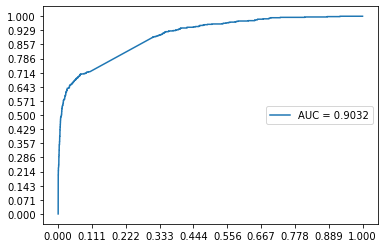

In [47]:
fpr_cw, tpr_cw, t_cw = roc_curve(y_test, y_pred_prob_cw)

auc_cw = roc_auc_score(y_test, y_pred_prob_cw)

plt.plot(fpr_cw, tpr_cw, label='AUC = '+str(round(auc_cw,4)))
plt.xticks(np.linspace(0,1,10))
plt.yticks(np.linspace(0,1,15))
plt.legend(loc=5)
plt.show()

### Implementing GridSearchCV() and StratifiedKFold()

In [48]:
skf = StratifiedKFold(n_splits=4,shuffle=True,random_state=101)
print(skf)

StratifiedKFold(n_splits=4, random_state=101, shuffle=True)


In [49]:
skf.get_n_splits(X,y)

4

In [50]:
for train_index, test_index in skf.split(X,y):
    print("Train:", train_index, "Test:", test_index)

Train: [    0     1     3 ... 31959 31960 31961] Test: [    2    13    14 ... 31947 31948 31956]
Train: [    0     1     2 ... 31956 31958 31959] Test: [    5     8    10 ... 31957 31960 31961]
Train: [    2     4     5 ... 31957 31960 31961] Test: [    0     1     3 ... 31955 31958 31959]
Train: [    0     1     2 ... 31959 31960 31961] Test: [    4     6     9 ... 31943 31946 31954]


In [51]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
c_space = np.logspace(-15,0,16)
class_weights = [{0:(22276+22304)/22276, 1:(22276+22304)/22304}]

In [53]:
c_space

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])

In [54]:
params = {'C':c_space,
          'class_weight':class_weights,
          'penalty':('l1','l2','elasticnet','none'),
          'solver':('liblinear','lbfgs')}

In [55]:
gcv = GridSearchCV(estimator=lr, param_grid=params, scoring='recall', cv=skf, verbose=3)

In [56]:
gcv.fit(X_train, y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits
[CV 1/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 2/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 3/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.7s
[CV 4/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 1/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=lbfgs; total time=   0.1s
[CV 2/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=lbfgs; total time=   0.1s
[CV 3/4] END C=1e-15, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=lbfgs; total time=   0.1s
[CV 4/4] END C=1e-15, cla

[CV 3/4] END C=1e-14, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.4s
[CV 4/4] END C=1e-14, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.7s
[CV 1/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 2/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.8s
[CV 3/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 4/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.7s
[CV 1/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=lbfgs; total time=   0.2s
[CV 2/4] END C=1e-13, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, p

[CV 1/4] END C=1e-12, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.9s
[CV 2/4] END C=1e-12, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.0s
[CV 3/4] END C=1e-12, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.0s
[CV 4/4] END C=1e-12, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.4s
[CV 1/4] END C=1e-11, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.7s
[CV 2/4] END C=1e-11, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 3/4] END C=1e-11, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.6s
[CV 4/4] END C=1e-11, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, p

[CV 3/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 4/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 1/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.9s
[CV 2/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.2s
[CV 3/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.0s
[CV 4/4] END C=1e-10, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.5s
[CV 1/4] END C=1e-09, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=l1, solver=liblinear; total time=   0.7s
[CV 2/4] END C=1e-09, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392

[CV 1/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 2/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 3/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 4/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 1/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  12.1s
[CV 2/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.5s
[CV 3/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.0s
[CV 4/4] END C=1e-08, class_weight={0: 2.0012569581612496, 1: 1.9987446197

[CV 3/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 4/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 1/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 2/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 3/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 4/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 1/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=lbfgs; total time=  11.8s
[CV 2/4] END C=1e-06, class_weight={0: 2.0012569581612496, 1: 

[CV 1/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 2/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 3/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 4/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 1/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 2/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 3/4] END C=0.0001, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 4/4] END C=0.0001, class_weight={0: 2.00125

[CV 4/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=liblinear; total time=   0.1s
[CV 1/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 2/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 3/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 4/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 1/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 2/4] END C=0.01, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 3/4] END C=0.01, class_weight={0: 2.001256958161249

[CV 3/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=liblinear; total time=   0.1s
[CV 4/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=liblinear; total time=   0.1s
[CV 1/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 2/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 3/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 4/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=elasticnet, solver=lbfgs; total time=   0.1s
[CV 1/4] END C=1.0, class_weight={0: 2.0012569581612496, 1: 1.9987446197991392}, penalty=none, solver=liblinear; total time=   0.1s
[CV 2/4] END C=1.0, class_weight={0: 2.0012569581612496,

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=101, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'class_weight': [{0: 2.0012569581612496,
                                           1: 1.9987446197991392}],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('liblinear', 'lbfgs')},
             scoring='recall', verbose=3)

In [57]:
gcv.best_params_

{'C': 1e-15,
 'class_weight': {0: 2.0012569581612496, 1: 1.9987446197991392},
 'penalty': 'none',
 'solver': 'lbfgs'}

In [58]:
gcv.best_score_

0.5381455399061033

In [59]:
gcv.score(X_test, y_test)

0.5762081784386617

In [60]:
pred_gcv = gcv.predict(X_test)

In [61]:
accuracy_score(y_test, pred_gcv)

0.9510699536979101

In [62]:
print(classification_report(y_test, pred_gcv))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7453
           1       0.66      0.58      0.61       538

    accuracy                           0.95      7991
   macro avg       0.81      0.78      0.79      7991
weighted avg       0.95      0.95      0.95      7991



In [63]:
print(confusion_matrix(y_test, pred_gcv))

[[7290  163]
 [ 228  310]]


In [64]:
recall_score(y_test, pred_gcv)

0.5762081784386617

In [65]:
f1_score(y_test, pred_gcv)

0.6132542037586547

### There is a considerable increase in the recall score and f1 score on applying GridSearchCV(), StratifiedFold() and class weights. This shows that the number of False Negatives have decreased which is our target.